In [18]:
import cv2

In [19]:
import numpy as np

In [20]:
import math

In [21]:
from matplotlib import pyplot as plt

In [22]:
from scipy.signal import find_peaks

In [23]:
from statistics import mean


In [24]:
hue_list=[]

In [25]:
coords=[]

In [26]:
movements=[]

In [27]:
cap = cv2.VideoCapture('../Downloads/rainsample.MOV')
ret,frame=cap.read()
ret, frame1 = cap.read()
i=0
old_iteration=0

frame1 = cv2.resize(frame1, (568,320))
out=np.full_like(frame1,[0,0,0])
hsv = cv2.cvtColor(frame1,cv2.COLOR_BGR2HSV)
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)
lower_red = np.array([170,120,70])
upper_red = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lower_red,upper_red)
mask1 = mask1+mask2

res = cv2.bitwise_and(frame1,frame1, mask= mask1)



frame1=res
    
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255


while(1):
    
    i=i+1
    frameno=i
    name='windrip3/'+str(frameno) + '.jpg'
    
   
    color = np.uint8([[[hue,saturation,lightness ]]])
    color = cv2.cvtColor(color,cv2.COLOR_HSV2BGR)
    
    ret, frame2 = cap.read()
    
    
    frame2 = cv2.resize(frame2, (568,320))
    orig=frame2.copy()
    
    hsv = cv2.cvtColor(frame2,cv2.COLOR_BGR2HSV)
    lower_red = np.array([0,120,70])
    upper_red = np.array([10,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    lower_red = np.array([170,120,70])
    upper_red = np.array([180,255,255])
    mask2 = cv2.inRange(hsv,lower_red,upper_red)
    mask1 = mask1+mask2

    res = cv2.bitwise_and(frame2,frame2, mask= mask1)
    
    frame2=res
    
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    
     
    gray = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
    ret,thresh_equ = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    thresh_equ = cv2.morphologyEx(thresh_equ, cv2.MORPH_OPEN, kernel)
    
    im2, contours, hierarchy = cv2.findContours(thresh_equ, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    cnts=contours
    
    centers=[]
    
    thresh_equ = cv2.merge([thresh_equ,thresh_equ,thresh_equ])
    
    
    
    if len(cnts)!=0:
        c = max(contours, key = cv2.contourArea)
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        x,y,w,h = cv2.boundingRect(c)
        roi=hsv[y:y+h,x:x+w ]
        roi2=out[y:y+h,x:x+w ]
        roi2= cv2.cvtColor(roi2,cv2.COLOR_BGR2HSV)
        
        vals=np.reshape(roi,(-1,3))
        vals2=np.reshape(roi2,(-1,3))
        
        flat_vals=np.average(vals,axis=0)
        flat_vals2=np.average(vals2,axis=0)
        
        line=int(flat_vals[2]/35)+1
        hues_detected=flat_vals[0]
        hue_list.append(hues_detected)
        coords.append([cX,cY])
        movements.append(flat_vals[2])
        
        
        
   
    
    
    #print(hues_detected)
    
    cv2.imshow('res',res)
    cv2.imshow('roi',roi)
    cv2.imshow('thresh_equ',thresh_equ)
    cv2.imshow('rgb',rgb)
    
    
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    prvs = next

cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


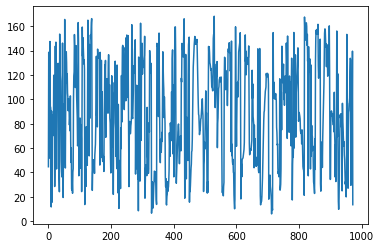

In [29]:
plt.plot(hue_list) # abrupt changes in direction detected using signal peaks 

In [30]:
det_peaks=find_peaks(hue_list)

In [31]:
det_peaks

(array([  1,   3,   5,  10,  12,  14,  17,  22,  24,  31,  36,  45,  49,
         52,  57,  60,  64,  68,  70,  73,  76,  83,  88,  95, 101, 104,
        108, 110, 114, 118, 121, 126, 129, 131, 134, 138, 144, 153, 155,
        157, 161, 163, 165, 169, 171, 176, 180, 182, 186, 189, 192, 195,
        202, 205, 213, 216, 219, 223, 227, 229, 231, 233, 237, 245, 248,
        250, 254, 259, 266, 268, 272, 277, 280, 283, 286, 288, 294, 297,
        299, 302, 307, 311, 315, 321, 323, 328, 331, 338, 342, 346, 349,
        353, 358, 362, 365, 370, 375, 380, 386, 389, 393, 396, 398, 405,
        415, 422, 424, 426, 428, 433, 438, 441, 443, 449, 451, 467, 474,
        491, 498, 502, 504, 508, 511, 513, 519, 527, 529, 536, 538, 547,
        551, 556, 562, 566, 574, 577, 582, 584, 586, 589, 597, 603, 612,
        616, 628, 630, 634, 639, 645, 650, 652, 657, 659, 661, 665, 668,
        672, 674, 678, 695, 698, 705, 707, 713, 717, 719, 725, 731, 734,
        738, 743, 745, 750, 752, 755, 759, 763, 766

In [18]:
large_drops=[5,6,7]

In [19]:
small_drops=[1,2,3,4,5]


In [20]:
small_drops_choice=np.arange(0,len(small_drops))

In [21]:
large_drops_choice=np.arange(0,len(large_drops))

In [22]:
max(movements)

199.9452887537994

In [23]:
min(movements)

14.811891233766234

In [25]:
avg_mvt=mean(movements)


In [46]:
i=0
cap = cv2.VideoCapture('../Downloads/rainsample.MOV')
ret,frame=cap.read()
frame = cv2.resize(frame1, (568,320))
out=np.full_like(frame1,[255,255,255])
color=(0,0,0)
while True:
    name='inky/'+str(i) + '.jpg' #'dir/1.jpg'

    ret, frame2 = cap.read()
    frame2 = cv2.resize(frame2, (568,320))
    draw_center=coords[i]
    if i in det_peaks[0]:
        line=np.random.choice(large_drops_choice)
        line=large_drops[line]
    else:
        line=np.random.choice(small_drops_choice)
        line=small_drops[line]
    
    if i==400:
        color=(92,4,17)
    if(i!=0):
        
        if movements[i]>avg_mvt:
            speed=movements[i]-avg_mvt
            
            dist= math.sqrt(math.pow(coords[i-1][0] - coords[i][0], 2) +
            math.pow(coords[i-1][1] - coords[i][1], 2) * 1.0)
            if dist<20:
                cv2.line(out, (coords[i-1][0],coords[i-1][1]), (coords[i][0],coords[i][1]), color, 1)
        if movements[i]<avg_mvt:
            speed=avg_mvt-movements[i]
      
    
    cv2.circle(out, (draw_center[0], draw_center[1]),line, color, -1)
    
    cv2.imshow('res',out)
    #cv2.imwrite(name,out)

    i=i+1
    
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

IndexError: list index out of range

In [28]:
cap.release()
cv2.destroyAllWindows()